### Bootstrapping to Estimate Standard Erros and Confidence Intervals

Overview: 

- Bootstrapping in statistics is a re-sampling based approach useful for estimating the **sampling distribution** and **standard error** of an estimate.
- Bootstrapping provides an alternative approach to approaches based on large-sample theory (you may recall that many approaches rely on having a large `n` in order to carry out the method).
- Bootstrapping becomes particularly useful when dealing with more complicated estimates, where their **standard error** may not be easily calculated, or the shape of their sampling distribution is not easy to estimate.
- Many classic approaches make inferences about **means/medians**, etc. Bootstrapping opens the door to working with much more interesting, and informative, estimates.

#### Part A: Lab

For this lab/programming assignment, we will look at the the study of the language center in the brains of chimpanzees.

A brain is considered to be **asymmetrical** if the two hemispheres are different from each other, structurally, and/or functionally. The most well established brain asymmetry is related to language, in which the specialized left hemisphere is markedly expanded in most people, especially in Broca's speech area, the planum temporale (Toga and Thompson, 2003). Brain asymmetry is believed to be evolutionary adaptive, since unilateral computation and control might be more efficient than bilateral. It also reduces possible interference between hemispheres, freeing up the opposite hemisphere for other specialized functions [Toga and Thompson, 2003](<https://www.frontiersin.org/articles/10.3389/fnhum.2014.00877/full>).

In [1]:
library(tidyverse)

chimp <- read.csv("ChimpBrains.csv")
summary(chimp)
head(chimp)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



      chimpName  sex    asymmetryScore   
 Ada       : 1   F:10   Min.   :-0.3000  
 Anna      : 1   M:10   1st Qu.:-0.1750  
 Atlanta   : 1          Median : 0.1400  
 Austin    : 1          Mean   : 0.1915  
 Carmichael: 1          3rd Qu.: 0.3250  
 Cheri     : 1          Max.   : 1.1900  
 (Other)   :14                           

,chimpName,sex,asymmetryScore
,<fct>,<fct>,<dbl>
1,Austin,M,0.30
2,Carmichael,M,0.16
3,Chuck,M,-0.24
4,Dobbs,M,-0.25
5,Donald,M,0.36
6,Hoboh,M,0.17


Below is the histogram for Rodman's area 44 asymmetry score for *20 chimps*. We can see that this is not a symmetric distribution and that it is skewed. Thus we will use the sample median to estimate the population median. We don't have a lot of theory to help us if we are trying to figure out the sampling distribution of the median. There is a lot of theory about the sampling distribution of the mean but not much theory regarding the sampling distribution of the median.

We need a different method for accessing standard errors and confidence intervals thus we will use the **bootstrap**.

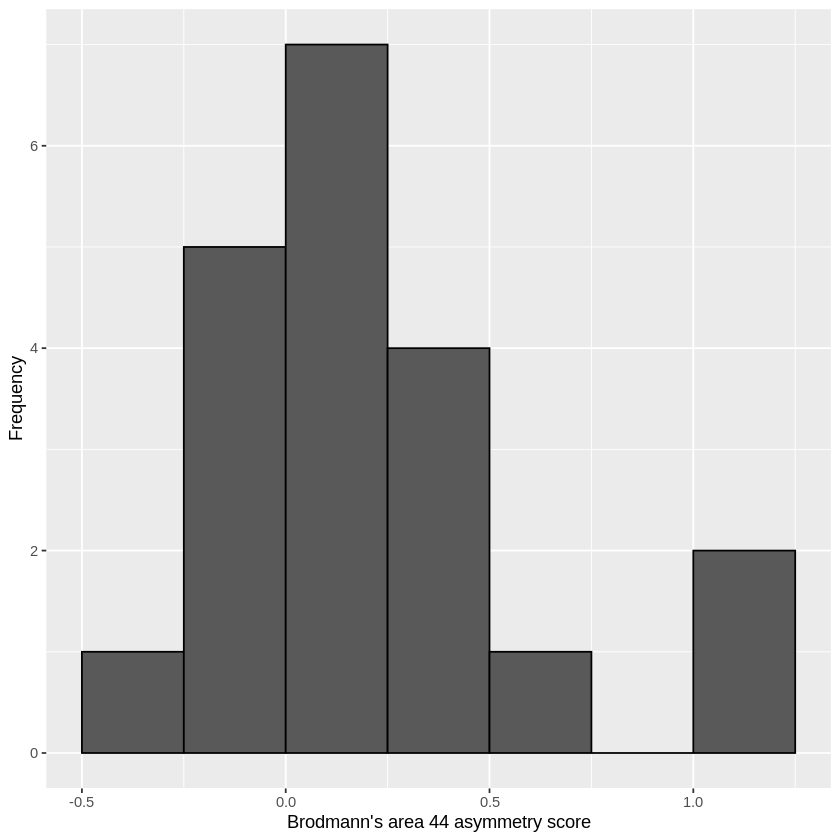

In [2]:
ggplot(data = chimp, aes(x = asymmetryScore)) + 
  geom_histogram(col = "black", binwidth = 0.25, closed = "left", boundary = 0) +
  labs( x = "Brodmann's area 44 asymmetry score", y = "Frequency")

First we calculate the sample median:

In [3]:
median(chimp$asymmetryScore)

[1] 0.14

Our sample median is `0.14` and thus we want to get some sense of the uncertainty around that estimate, and the way we will do that is using bootstrap samples!

In [4]:
B <- 10000
bootMedian <- vector()
for(i in 1:B){
  bootSample <- sample(chimp$asymmetryScore, size = nrow(chimp),
                       replace =TRUE)
  
bootMedian[i] <- median(bootSample)
  cat("Bootstrap sample:", i, "\n")
}

Bootstrap sample: 1 
Bootstrap sample: 2 
Bootstrap sample: 3 
Bootstrap sample: 4 
Bootstrap sample: 5 
Bootstrap sample: 6 
Bootstrap sample: 7 
Bootstrap sample: 8 
Bootstrap sample: 9 
Bootstrap sample: 10 
Bootstrap sample: 11 
Bootstrap sample: 12 
Bootstrap sample: 13 
Bootstrap sample: 14 
Bootstrap sample: 15 
Bootstrap sample: 16 
Bootstrap sample: 17 
Bootstrap sample: 18 
Bootstrap sample: 19 
Bootstrap sample: 20 
Bootstrap sample: 21 
Bootstrap sample: 22 
Bootstrap sample: 23 
Bootstrap sample: 24 
Bootstrap sample: 25 
Bootstrap sample: 26 
Bootstrap sample: 27 
Bootstrap sample: 28 
Bootstrap sample: 29 
Bootstrap sample: 30 
Bootstrap sample: 31 
Bootstrap sample: 32 
Bootstrap sample: 33 
Bootstrap sample: 34 
Bootstrap sample: 35 
Bootstrap sample: 36 
Bootstrap sample: 37 
Bootstrap sample: 38 
Bootstrap sample: 39 
Bootstrap sample: 40 
Bootstrap sample: 41 
Bootstrap sample: 42 
Bootstrap sample: 43 
Bootstrap sample: 44 
Bootstrap sample: 45 
Bootstrap sample: 4

The way the bootstrap sample works is that it takes the sample and picks one of these numbers at random. In this case the first number it picked (varies) is put back into the sample again and the second number is picked at random and so on. This is sampling **WITH** replacement. (Recall that a permutation is sampling without replacement. A simulation is sampling with replacement. We are looking at bootstrapping and a bootstrap sample is sampling with replacement.) Note that it is possible for each value in the original sample to be picked more than once in the bootstrap sample (see lecture video.)

With the bootstrap sample, we can calculate median for the bootstrap sample a bunch of times, which will give us an estimate of the sampling distribution of the median. (10,000 bootstrap replicates, set up a results vector to store our results, and run the loop 10,000 times).

We will now look at the histogram of the results. This histogram represents an estimate of the sampling distribution of the median in this case. Therefore we can use this estimated sampling distribution to calculate a **standard error**. and **confidence interval**

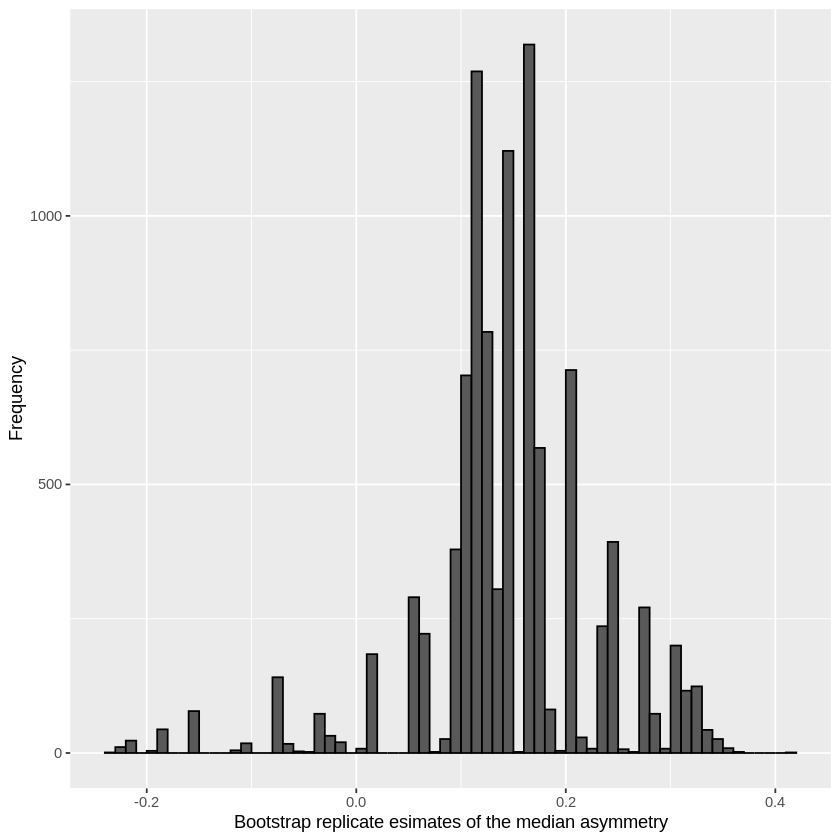

In [5]:
ggplot(data= data.frame(bootMedian) , aes(x = bootMedian)) +
  geom_histogram(col = "black", binwidth = 0.01,
                 closed = "left", boundary = 0) +
labs(x = "Bootstrap replicate esimates of the median asymmetry", 
     y = "Frequency")

Note that when calculating the mean of the sampling distribution we would expect it to be pretty close to the actual sample median. In more complicated examples, these two values can different more than they do here and in those cases we might want to make an adjustment for that bias (beyond the scope of this course).

Recall that the **standard deviation of a sampling distribution** is known as the **standard error**. This is the measure of the uncertainty in our estimated median.

Another method is to come up with the confidence interval. If we figured out the 2.5th percentile of this distribution, and the 97.5th percentile, we would have 95% of the distribution in between and thus it is giving us an estimated 95% confidence interval.

In [6]:
# bootstrap mean, standard error, confidence interval 
mean(bootMedian)
sd(bootMedian) # standard error 
quantile(bootMedian, probs = c(0.025, 0.975)) # approximate 95% CI

[1] 0.141759

[1] 0.08486346

2.5%  97.5% 
-0.075  0.310

Thus we are 95% confidence that the population median is between -0.075 and 0.310.

Alternatively, use the `boot` package. Then we will write a function that will calculate our estimates and in this case our estimate is the sample median and then use the `boot` function on the data and include the number of replicates.

In [7]:
library(boot)

boot.median <- function(x, i){ median(x[i])}
bootChimp <- boot(chimp$asymmetryScore, boot.median, R = 10000)
bootChimp
boot.ci(bootChimp, type = "perc")


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = chimp$asymmetryScore, statistic = boot.median, R = 10000)


Bootstrap Statistics :
    original  bias    std. error
t1*     0.14 0.00295  0.08629778

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = bootChimp, type = "perc")

Intervals : 
Level     Percentile     
95%   (-0.075,  0.310 )  
Calculations and Intervals on Original Scale

We obtain our sample median. Then our bias and standard error. (We can ignore the bias). Observe than these values are very close to the ones we just manually coded and calculated. It's not going to be exactly the same because every time we run the bootstrap we're doing random sampling and thus our result will be a little different each time.

We used the`boot.ci` function to calculate the confidence interval.

For your **programming assignment**, we will be looking at a data set pertaining to crickets!

#### Part B: Programming Assignment

This data set contains information pertaining to Sage Brush crickets that were either starved or fed and the time to mating is the response variable.

In [8]:
cannibalism <- read.csv("SagebrushCrickets.csv")
summary(cannibalism)
head(cannibalism)

 feedingStatus  timeToMating  
 fed    :13    Min.   : 1.50  
 starved:11    1st Qu.: 3.75  
               Median :16.30  
               Mean   :27.62  
               3rd Qu.:42.85  
               Max.   :88.90  

,feedingStatus,timeToMating
,<fct>,<dbl>
1,starved,1.9
2,starved,2.1
3,starved,3.8
4,starved,9.0
5,starved,9.6
6,starved,13.0


In [9]:
cannibalism$feedingStatus <- factor(cannibalism$feedingStatus ,
                                    levels = c("starved", "fed"))

Note that a 2-sample t-test cannot be used on this data set because the distribution of starved crickets and of the fed crickets do not look normal. (That is an assumption needed to use the 2-sample t-test).

With *non-norma*l data, it turns out that the **median** is often a more useful measure of the center of the data than the **mean** is. In the coding block below here we will look at the different between the sample medians of the two groups.

In [10]:
twoMedians <- tapply(cannibalism$timeToMating, 
                     cannibalism$feedingStatus, median)

diffMedian <- twoMedians[1] - twoMedians[2]
diffMedian

starved 
   -9.8

##### Question 1

We do not have a lot of theory to help us with the sampling distribution of the difference between two medians therefore you must now use the `bootstrap` to come up with an estimated sampling distribution. This will allow you to access the uncertainty in this estimate. **PLEASE USE THE BOOT FUNCTION** for your calculation. **NO LOOPING TO BE USED**.

To use the boot function you will need a function to calculate the estimate that you're interested in. The function is provided below.

In [11]:
boot.diffMedian <- function(x, i){
   twoMedians <- tapply(x$timeToMating[i], x$feedingStatus[i],
                       median)
  diffMedian <- twoMedians[1] - twoMedians[2]
}


Now that we have the function above defined, go ahead and obtain the bootstrap replicate estimates on the data using the output `bootResults` and the function `boot` with the inputs into the `boot` function being `cannibalism`, and the function we just created, `boot.diffMedian` and run `R=10000` for your bootstrap replicas. Comment on your Results from the observed difference in the medians. Do not worry about the bias.

In [12]:
bootResults <- boot(cannibalism, boot.diffMedian, R=10000)
bootResults



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = cannibalism, statistic = boot.diffMedian, R = 10000)


Bootstrap Statistics :
    original    bias    std. error
t1*     -9.8 -7.575825    19.15974

From the results, we observe that we get -9.8 as before. We will not worry about the bias.


##### Question 2

Plot the estimate of our sampling distribution using the `ggplot` function. Make your plot a histogram plot. Remember to put your data into a `data.frame` and within the `data.frame` apply the `diffMedians=bootResults$t` syntax. Label your x-axis `Bootstrap replicate difference in median` and label your y-axis `Frequency`. For aesthetics you can set your `x=diffMedians` and add the `geom_histogram` function. Color can be of any preference you choose, a `binwidth=5` is fine, `closed=left` and set `boundary=0`. Your plot should look like the following: 

<div>
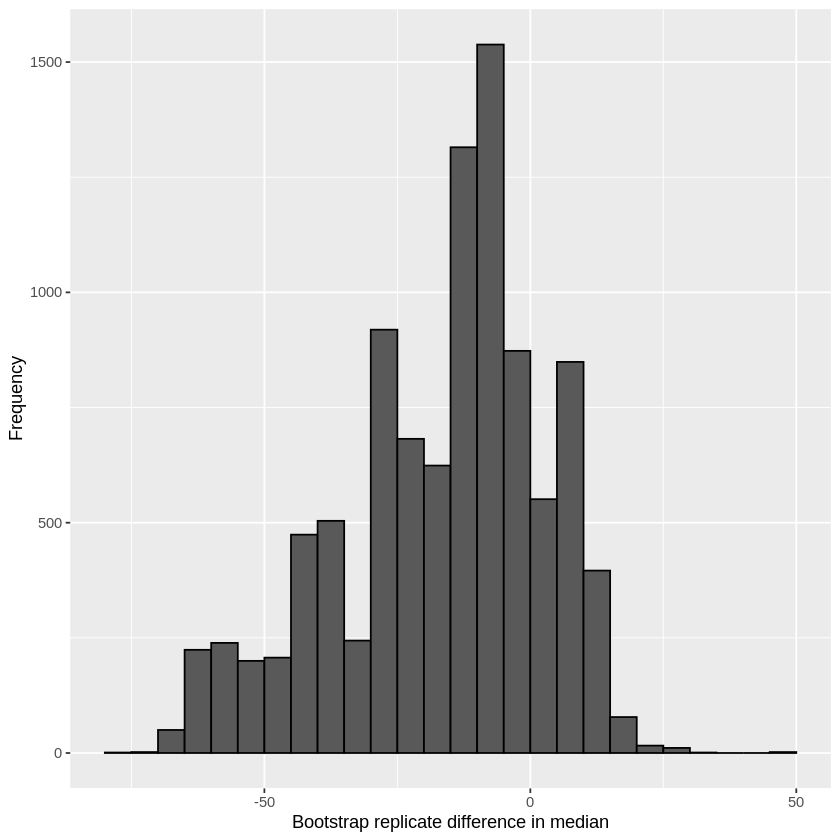
</div>

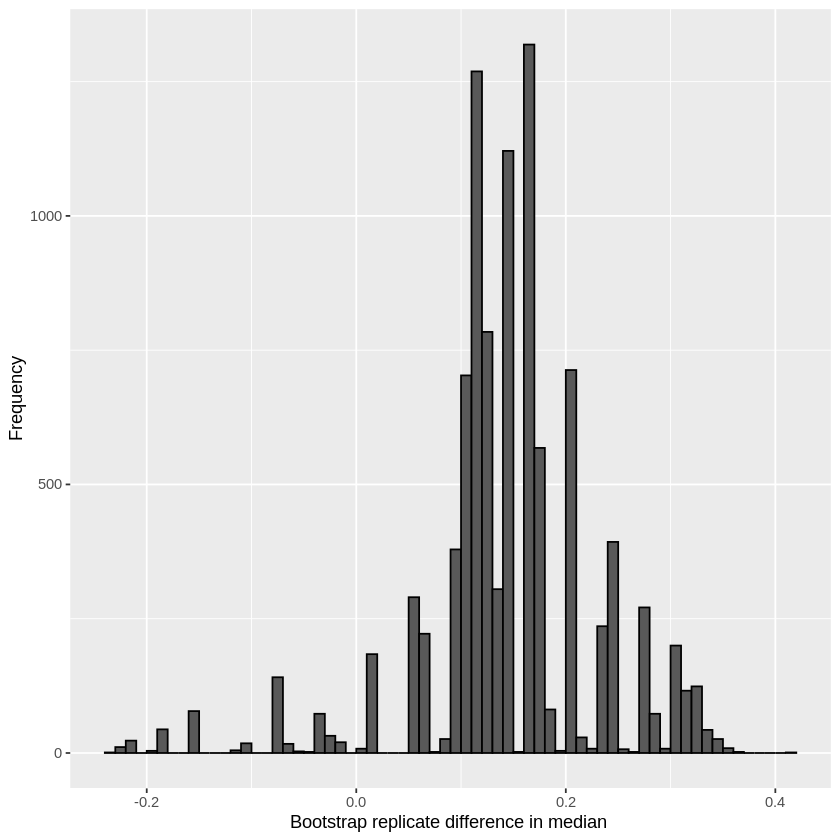

In [13]:
plot <- ggplot(data= data.frame(bootMedian) , aes(x = bootMedian)) +
  geom_histogram(col = "black", binwidth = 0.01,
                 closed = "left", boundary = 0) +
labs(x = "Bootstrap replicate difference in median ", 
     y = "Frequency")

plot

##### Question 3

Calculate the bootstrap confidence interval using the function `boot.ci` and the inputs `bootResults` and `type = perc`. Comment on your results.

In [14]:
bootci <- boot.ci(bootResults, type = 'perc')

# your code here
